In [1]:
import urllib.request
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize

import collections 
from wordcloud import wordcloud,ImageColorGenerator

from PIL import Image 
import matplotlib.pyplot as plt 
import imageio

In [2]:
f = open('Musical_Instruments_5.json', encoding='utf-8')

lst = f.readlines()

# print(d)
f.close()

In [3]:
len(lst)

10261

In [4]:
type(lst)

list

In [5]:
test = []
for line in lst:
    eq_parsed_json = json.loads(lst[0])
    for key in eq_parsed_json.keys():
        test.append(key)

In [6]:
# find out the keys in this json file
set(test)

{'asin',
 'helpful',
 'overall',
 'reviewText',
 'reviewTime',
 'reviewerID',
 'reviewerName',
 'summary',
 'unixReviewTime'}

In [7]:
eq_parsed_json['reviewText']

"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,"

In [8]:
eq_parsed_json['summary']

'good'

In [9]:
print(json.dumps(eq_parsed_json, indent = 2))

{
  "reviewerID": "A2IBPI20UZIR0U",
  "asin": "1384719342",
  "reviewerName": "cassandra tu \"Yeah, well, that's just like, u...",
  "helpful": [
    0,
    0
  ],
  "reviewText": "Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,",
  "overall": 5.0,
  "summary": "good",
  "unixReviewTime": 1393545600,
  "reviewTime": "02 28, 2014"
}


In [10]:
asin = []
helpful = []
overall = []
reviewText = []
reviewTime = []
reviewerID = []
reviewerName = []
summary = []
unixReviewTime = []


In [11]:
# store the data into a dataframe
for line in lst:
    aa = json.loads(line)
    try:
        asin.append(aa['asin'])
    except (AttributeError, KeyError):
        asin.append(None_1)
    try:
        helpful.append(aa['helpful'])
    except (AttributeError, KeyError):
        helpful.append(None)    
    try:
        overall.append(aa['overall'])
    except (AttributeError, KeyError):
        overall.append(None)
    try:
        reviewText.append(aa['reviewText'])
    except (AttributeError, KeyError):
        reviewText.append(None)        
    try:
        reviewTime.append(aa['reviewTime'])
    except (AttributeError, KeyError):
        reviewTime.append(None)
    try:
        reviewerID.append(aa['reviewerID'])
    except (AttributeError, KeyError):
        reviewerID.append(None)
    try:
        reviewerName.append(aa['reviewerName'])
    except (AttributeError, KeyError):
        reviewerName.append(None)
    try:
        summary.append(aa['summary'])
    except (AttributeError, KeyError):
        summary.append(None)
    try:
        unixReviewTime.append(aa['unixReviewTime'])
    except (AttributeError, KeyError):
        unixReviewTime.append(None)


In [12]:
df_js = pd.DataFrame({'asin':asin, 'helpful':helpful, 'overall':overall, 'reviewText':reviewText, 'reviewTime':reviewTime,
                      'reviewerID':reviewerID, 'reviewerName':reviewerName, 'summary':summary, 'unixReviewTime':unixReviewTime})
df_js.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1384719342,"[0, 0]",5.0,"Not much to write about here, but it does exac...","02 28, 2014",A2IBPI20UZIR0U,"cassandra tu ""Yeah, well, that's just like, u...",good,1393545600
1,1384719342,"[13, 14]",5.0,The product does exactly as it should and is q...,"03 16, 2013",A14VAT5EAX3D9S,Jake,Jake,1363392000
2,1384719342,"[1, 1]",5.0,The primary job of this device is to block the...,"08 28, 2013",A195EZSQDW3E21,"Rick Bennette ""Rick Bennette""",It Does The Job Well,1377648000
3,1384719342,"[0, 0]",5.0,Nice windscreen protects my MXL mic and preven...,"02 14, 2014",A2C00NNG1ZQQG2,"RustyBill ""Sunday Rocker""",GOOD WINDSCREEN FOR THE MONEY,1392336000
4,1384719342,"[0, 0]",5.0,This pop filter is great. It looks and perform...,"02 21, 2014",A94QU4C90B1AX,SEAN MASLANKA,No more pops when I record my vocals.,1392940800


In [13]:
len(df_js)

10261

In [14]:
len(df_js['reviewTime'].unique())

1570

In [15]:
df_new = df_js[['overall', 'reviewTime']]

In [16]:
df_new

,overall,reviewTime
0,5.0,"02 28, 2014"
1,5.0,"03 16, 2013"
2,5.0,"08 28, 2013"
3,5.0,"02 14, 2014"
4,5.0,"02 21, 2014"
...,...,...
10256,5.0,"07 20, 2014"
10257,5.0,"07 2, 2014"
10258,4.0,"07 22, 2014"
10259,4.0,"07 1, 2014"


In [17]:
# preprocessing

In [18]:
df_new['text'] = df_js['reviewText'] + ', ' + df_js['summary']
df_new

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,overall,reviewTime,text
0,5.0,"02 28, 2014","Not much to write about here, but it does exac..."
1,5.0,"03 16, 2013",The product does exactly as it should and is q...
2,5.0,"08 28, 2013",The primary job of this device is to block the...
3,5.0,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,5.0,"02 21, 2014",This pop filter is great. It looks and perform...
...,...,...,...
10256,5.0,"07 20, 2014","Great, just as expected. Thank to all., Five ..."
10257,5.0,"07 2, 2014",I've been thinking about trying the Nanoweb st...
10258,4.0,"07 22, 2014",I have tried coated strings in the past ( incl...
10259,4.0,"07 1, 2014","Well, MADE by Elixir and DEVELOPED with Taylor..."


In [19]:
set(df_new['overall'])

{1.0, 2.0, 3.0, 4.0, 5.0}

In [20]:
df_new['reviewTime'] = pd.to_datetime(df_new['reviewTime'])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   overall     10261 non-null  float64       
 1   reviewTime  10261 non-null  datetime64[ns]
 2   text        10261 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 240.6+ KB


In [22]:
df_new.head(5)

,overall,reviewTime,text
0,5.0,2014-02-28,"Not much to write about here, but it does exac..."
1,5.0,2013-03-16,The product does exactly as it should and is q...
2,5.0,2013-08-28,The primary job of this device is to block the...
3,5.0,2014-02-14,Nice windscreen protects my MXL mic and preven...
4,5.0,2014-02-21,This pop filter is great. It looks and perform...


In [23]:
# Q1. Process one collection of data and summarize information from several fields.

In [24]:
# This is like the example program for analyzing twitter hashtags,
# but must access different and more fields than in those examples.

In [25]:
df_q1 = df_new[['overall', 'reviewTime', 'text']]
df_q1['reviewTime'] = df_q1['reviewTime'].dt.year
set(df_q1['reviewTime'])

{2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014}

In [26]:

def vect(x, y):
    stop_words = stopwords.words('english') 
    no_features = 1000
    
    tf_vectorizer = CountVectorizer(max_df = 0.98, min_df = 3, max_features = no_features, 
                                    stop_words = stop_words, ngram_range = (1, 3))
    tf = tf_vectorizer.fit_transform(x['text'])
    tf_feature_names = tf_vectorizer.get_feature_names()
    
    return sorted(list(tf_vectorizer.vocabulary_.items()), reverse = True)[:y]


In [27]:
# High frequency words of each year for 1 star

In [28]:
df_s1 = df_q1[df_q1.overall == 1.0]
for i in list(set(df_q1['reviewTime'])):
    
    x = df_s1[df_s1.reviewTime == i]
    
    if len(x) <= 3 :
        print('there are none or only few reviews in year:', i)
    else:
        lst_s = vect(x, 25)
        print('here are the top', len(lst_s) ,'words been used in year:', i)
        print(lst_s)
    print('=========================================================================================')
    

there are none or only few reviews in year: 2004
there are none or only few reviews in year: 2005
there are none or only few reviews in year: 2006
there are none or only few reviews in year: 2007
there are none or only few reviews in year: 2008
there are none or only few reviews in year: 2009
here are the top 4 words been used in year: 2010
[('one', 3), ('may', 2), ('good', 1), ('buy', 0)]
here are the top 25 words been used in year: 2011
[('would', 31), ('work', 30), ('weight', 29), ('way', 28), ('use', 27), ('top', 26), ('stand', 25), ('really', 24), ('purchased', 23), ('one', 22), ('never', 21), ('much', 20), ('long', 19), ('like', 18), ('hold', 17), ('guitars', 16), ('guitar', 15), ('great', 14), ('good', 13), ('going', 12), ('go', 11), ('get', 10), ('even', 9), ('enough', 8), ('could', 7)]
here are the top 25 words been used in year: 2012
[('zero', 282), ('yet', 281), ('year', 280), ('wrong', 279), ('would', 278), ('worst', 277), ('works', 276), ('worked', 275), ('work', 274), ('w

In [29]:
# High frequency words of each year for 2 star

In [30]:
df_s2 = df_q1[df_q1.overall == 2.0]
for i in list(set(df_q1['reviewTime'])):
    
    x = df_s2[df_s2.reviewTime == i]
    
    if len(x) <= 3 :
        print('there are none or only few reviews in year:', i)
    else:
        lst_s = vect(x, 25)
        print('here are the top', len(lst_s) ,'words been used in year:', i)
        print(lst_s)
    print('=========================================================================================')

there are none or only few reviews in year: 2004
there are none or only few reviews in year: 2005
there are none or only few reviews in year: 2006
there are none or only few reviews in year: 2007
there are none or only few reviews in year: 2008
there are none or only few reviews in year: 2009
here are the top 11 words been used in year: 2010
[('use', 10), ('sound', 9), ('purchased', 8), ('product', 7), ('price', 6), ('one', 5), ('need', 4), ('mic', 3), ('get', 2), ('first', 1), ('buy', 0)]
here are the top 25 words been used in year: 2011
[('would better', 150), ('would', 149), ('worth', 148), ('works', 147), ('work', 146), ('without', 145), ('wise', 144), ('well', 143), ('way', 142), ('want', 141), ('using', 140), ('used', 139), ('use', 138), ('two', 137), ('turn', 136), ('try', 135), ('tried', 134), ('tone', 133), ('tiny', 132), ('time', 131), ('thought', 130), ('think', 129), ('things', 128), ('thing', 127), ('thin', 126)]
here are the top 25 words been used in year: 2012
[('years',

In [31]:
# High frequency words of each year for 3 star

In [32]:
df_s3 = df_q1[df_q1.overall == 3.0]
for i in list(set(df_q1['reviewTime'])):
    
    x = df_s3[df_s3.reviewTime == i]
    
    if len(x) <= 3 :
        print('there are none or only few reviews in year:', i)
    else:
        lst_s = vect(x, 25)
        print('here are the top', len(lst_s) ,'words been used in year:', i)
        print(lst_s)
    print('=========================================================================================')

there are none or only few reviews in year: 2004
there are none or only few reviews in year: 2005
there are none or only few reviews in year: 2006
there are none or only few reviews in year: 2007
here are the top 8 words been used in year: 2008
[('well', 7), ('sound', 6), ('really', 5), ('pedal', 4), ('one', 3), ('need', 2), ('like', 1), ('good', 0)]
here are the top 23 words been used in year: 2009
[('would', 22), ('use', 21), ('turn', 20), ('though', 19), ('thing', 18), ('stick', 17), ('sound', 16), ('small', 15), ('place', 14), ('one', 13), ('old', 12), ('nice', 11), ('need', 10), ('make', 9), ('great', 8), ('good', 7), ('get', 6), ('far', 5), ('different', 4), ('cool', 3), ('better', 2), ('back', 1), ('also', 0)]
here are the top 25 words been used in year: 2010
[('years', 70), ('wrong', 69), ('would', 68), ('works', 67), ('well', 66), ('way', 65), ('using', 64), ('used', 63), ('use', 62), ('two', 61), ('try', 60), ('tried', 59), ('time', 58), ('though', 57), ('sure', 56), ('string

In [33]:
# High frequency words of each year for 4 star

In [34]:
df_s4 = df_q1[df_q1.overall == 4.0]
for i in list(set(df_q1['reviewTime'])):
    
    x = df_s4[df_s4.reviewTime == i]
    
    if len(x) <= 3 :
        print('there are none or only few reviews in year:', i)
    else:
        lst_s = vect(x, 25)
        print('here are the top', len(lst_s) ,'words been used in year:', i)
        print(lst_s)
    print('=========================================================================================')

there are none or only few reviews in year: 2004
there are none or only few reviews in year: 2005
there are none or only few reviews in year: 2006
here are the top 10 words been used in year: 2007
[('would', 9), ('use', 8), ('one', 7), ('like', 6), ('great', 5), ('good', 4), ('go', 3), ('get', 2), ('even', 1), ('controls', 0)]
here are the top 25 words been used in year: 2008
[('would', 126), ('works well', 125), ('works', 124), ('without', 123), ('well', 122), ('wanted', 121), ('want', 120), ('vocals', 119), ('using', 118), ('uses', 117), ('useful', 116), ('used', 115), ('use', 114), ('type', 113), ('two', 112), ('try', 111), ('top', 110), ('time', 109), ('things', 108), ('thing', 107), ('tell', 106), ('switch', 105), ('studio', 104), ('string', 103), ('still', 102)]
here are the top 25 words been used in year: 2009
[('yet', 205), ('would', 204), ('works', 203), ('work', 202), ('without', 201), ('wide', 200), ('well made', 199), ('well', 198), ('way', 197), ('want', 196), ('using', 19

In [35]:
# High frequency words of each year for 5 star

In [36]:
df_s5 = df_q1[df_q1.overall == 5.0]
for i in list(set(df_q1['reviewTime'])):
    
    x = df_s5[df_s5.reviewTime == i]
    
    if len(x) <= 3 :
        print('there are none or only few reviews in year:', i)
    else:
        lst_s = vect(x, 25)
        print('here are the top', len(lst_s) ,'words been used in year:', i)
        print(lst_s)
    print('=========================================================================================')

here are the top 16 words been used in year: 2004
[('using', 15), ('use', 14), ('tension', 13), ('sound', 12), ('set', 11), ('right', 10), ('quickly', 9), ('position', 8), ('playing', 7), ('perfect', 6), ('model', 5), ('lever', 4), ('get', 3), ('either', 2), ('drum', 1), ('bass', 0)]
there are none or only few reviews in year: 2005
here are the top 20 words been used in year: 2006
[('without', 19), ('well', 18), ('way', 17), ('used', 16), ('use', 15), ('tried', 14), ('still', 13), ('sound', 12), ('set', 11), ('one', 10), ('need', 9), ('low', 8), ('like', 7), ('instrument', 6), ('however', 5), ('guitar', 4), ('good', 3), ('get', 2), ('built', 1), ('available', 0)]
here are the top 25 words been used in year: 2007
[('zoom', 106), ('years ago', 105), ('years', 104), ('would', 103), ('works great', 102), ('works', 101), ('without', 100), ('well', 99), ('want', 98), ('using', 97), ('used', 96), ('use', 95), ('unlike', 94), ('two', 93), ('tune', 92), ('time', 91), ('three', 90), ('thought', 

----

In [37]:
# Q2. Process one collection of data and separate it into different categories and provided summary
# statistics on those categories. 

In [38]:
# o	For example, bin the tweets by day or by hour and report on the number of tweets per day or hour.

In [39]:
df_q2 = df_new[['overall', 'reviewTime']]
# df_q2.head()

In [40]:
# explore the distribution of overall(stars of each review) in each year
df_year = df_q2[['overall']]
df_year['year'] = df_q2['reviewTime'].dt.year
df_year.head()

,overall,year
0,5.0,2014
1,5.0,2013
2,5.0,2013
3,5.0,2014
4,5.0,2014


In [41]:
test = df_year
test['overall'] = test['overall'].astype('object')

In [42]:
test2 = pd.pivot_table(test, index = ['year'], columns = ['overall'], aggfunc = [len])

In [43]:
test3 = test2['len'].groupby('year').sum()
test3

overall,1.0,2.0,3.0,4.0,5.0
year,,,,,
2004,0.0,0.0,0.0,1.0,6.0
2005,0.0,0.0,0.0,1.0,3.0
2006,1.0,0.0,1.0,2.0,6.0
2007,0.0,1.0,0.0,5.0,16.0
2008,0.0,2.0,7.0,18.0,36.0
2009,3.0,2.0,8.0,30.0,85.0
2010,7.0,9.0,20.0,83.0,231.0
2011,15.0,31.0,84.0,195.0,682.0
2012,46.0,39.0,130.0,378.0,1343.0


In [44]:
# test3.info()
test3.to_csv('df_year.csv', index = False, sep = ',', encoding = 'utf-8')

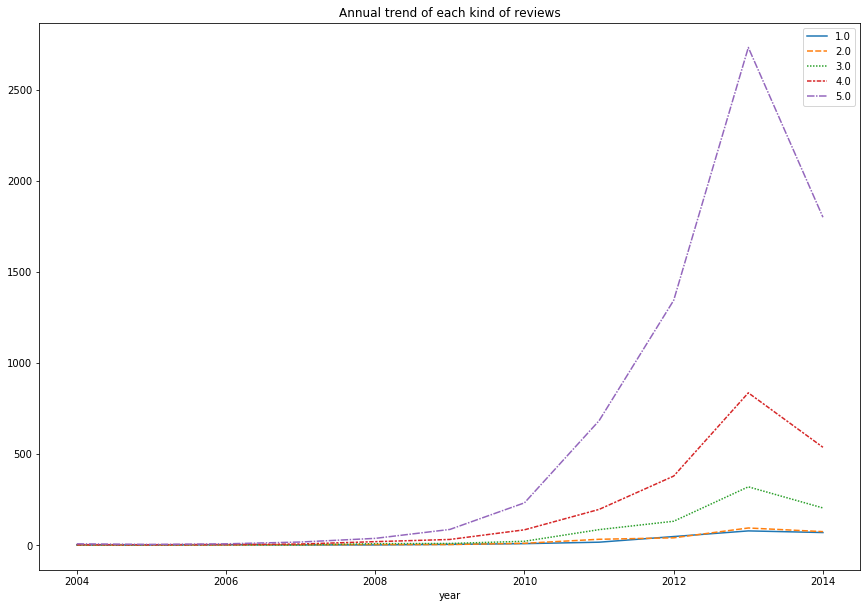

In [45]:
sns.lineplot(data = test3) # .set(xlim = (1916, 2017))

plt.title('Annual trend of each kind of reviews')
plt.subplots_adjust(left = 0.1, right = 2, bottom = 0.1, top = 2, wspace = 1, hspace = 1)

In [46]:
# have tried quarter.. too hard

In [47]:
# explore the distribution of overall(stars of each review) in each month

df_mo = df_q2[['overall', 'reviewTime']]
df_mo['month'] = df_q2['reviewTime'].dt.month

del df_mo['reviewTime']

df_mo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   overall  10261 non-null  float64
 1   month    10261 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 160.5 KB


In [48]:
df_mo.head()

,overall,month
0,5.0,2
1,5.0,3
2,5.0,8
3,5.0,2
4,5.0,2


In [49]:
test = df_mo
test['overall'] = test['overall'].astype('object')

In [50]:
test2 = pd.pivot_table(test, index = ['month'], columns = ['overall'], aggfunc = [len])

In [51]:
test3 = test2['len'].groupby('month').sum()
test3

overall,1.0,2.0,3.0,4.0,5.0
month,,,,,
1,32,36,95,256,847
2,19,23,86,228,707
3,26,22,83,208,704
4,19,13,67,179,644
5,18,24,62,159,588
6,26,28,57,174,524
7,9,19,63,152,502
8,8,13,44,127,424
9,7,20,42,126,387


In [52]:
test3.to_csv('df_month.csv', index = False, sep = ',', encoding = 'utf-8')

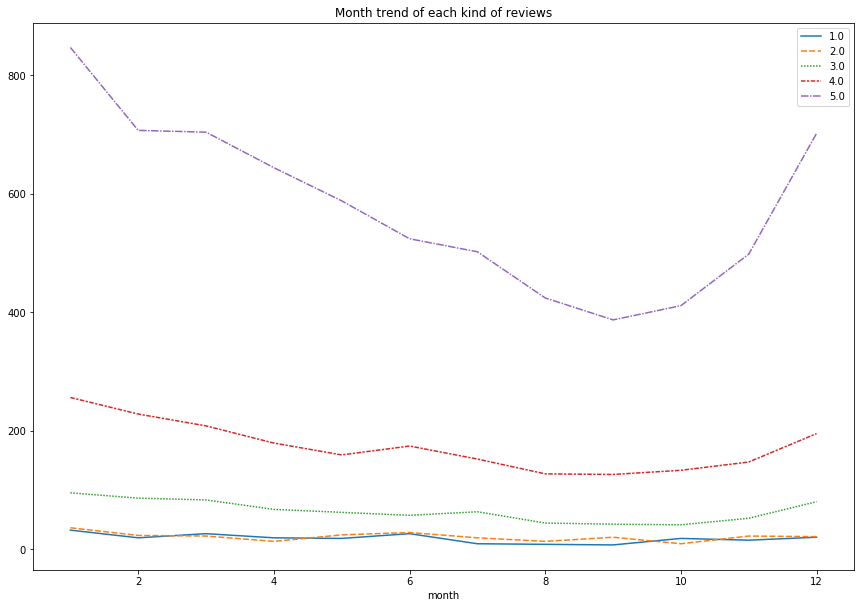

In [53]:
sns.lineplot(data = test3) # .set(xlim = (1916, 2017))

plt.title('Month trend of each kind of reviews')
plt.subplots_adjust(left = 0.1, right = 2, bottom = 0.1, top = 2, wspace = 1, hspace = 1)

----

In [54]:
# Q3. Process two or more collections of data and compare some summary data about the two collections together.

In [55]:
# o	For example,
# collect Twitter user timelines from different political candidates and compare the number of retweets of their tweets.

In [56]:
# in this question, I set overall higher than 3 as positive, and the others as negative, compare this two groups

In [57]:
df_q3 = df_new[['overall', 'text']]

In [58]:
df_q3["POS"] = df_q3["overall"].apply(lambda x: 0 if x < 4  else 1)

del df_q3['overall']

df_q3.head()

,text,POS
0,"Not much to write about here, but it does exac...",1
1,The product does exactly as it should and is q...,1
2,The primary job of this device is to block the...,1
3,Nice windscreen protects my MXL mic and preven...,1
4,This pop filter is great. It looks and perform...,1


In [59]:
df_pos = df_q3[df_q3.POS == 1]
df_neg = df_q3[df_q3.POS == 0]

### Positive features

In [60]:

stop_words = stopwords.words('english') 
no_features = 1000

tf_vectorizer = CountVectorizer(max_df = 0.98, min_df = 3, max_features = no_features, 
                                stop_words = stop_words, ngram_range = (2, 3))
tf = tf_vectorizer.fit_transform(df_pos['text'])
tf_feature_names = tf_vectorizer.get_feature_names()

sorted(list(tf_vectorizer.vocabulary_.items()), reverse = True)[:50]

[('years playing', 999),
 ('years old', 998),
 ('years come', 997),
 ('years always', 996),
 ('years ago', 995),
 ('year old', 994),
 ('year ago', 993),
 ('wound strings', 992),
 ('would work', 991),
 ('would use', 990),
 ('would suggest', 989),
 ('would say', 988),
 ('would recommend anyone', 987),
 ('would recommend', 986),
 ('would purchase', 985),
 ('would probably', 984),
 ('would nice', 983),
 ('would make', 982),
 ('would like', 981),
 ('would highly recommend', 980),
 ('would highly', 979),
 ('would great', 978),
 ('would give', 977),
 ('would get', 976),
 ('would expect', 975),
 ('would definitely', 974),
 ('would buy', 973),
 ('worth price', 972),
 ('worth money', 971),
 ('worth extra', 970),
 ('worth every penny', 969),
 ('worth every', 968),
 ('works well', 967),
 ('works really well', 966),
 ('works really', 965),
 ('works perfectly', 964),
 ('works perfect', 963),
 ('works like charm', 962),
 ('works like', 961),
 ('works great', 960),
 ('works good', 959),
 ('works fine'

#### Visualization

In [61]:
word_counts = dict(tf_vectorizer.vocabulary_.items())

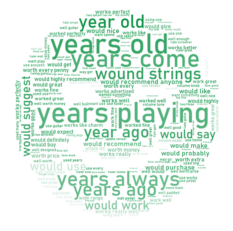

In [62]:
mask = imageio.imread("pos.jpg")

wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/Bahnschrift.ttf', 
    mask=mask, 
    max_words=200, 
    #max_font_size=100 
    width=1000,
    height=700,
    background_color='white' #,
    # scale = 15

)

image_colors = ImageColorGenerator(mask)


wc.generate_from_frequencies(word_counts) 
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

wc.to_file('POS.png')

### Negative features

In [63]:

stop_words = stopwords.words('english') 
no_features = 1000

tf_vectorizer = CountVectorizer(max_df = 0.98, min_df = 3, max_features = no_features, 
                                stop_words = stop_words, ngram_range = (2, 3))
tf = tf_vectorizer.fit_transform(df_neg['text'])
tf_feature_names = tf_vectorizer.get_feature_names()

sorted(list(tf_vectorizer.vocabulary_.items()), reverse = True)[:50]

[('years never', 999),
 ('years ago', 998),
 ('year old', 997),
 ('year ago', 996),
 ('xlr cable', 995),
 ('wrong way', 994),
 ('would work', 993),
 ('would want', 992),
 ('would use', 991),
 ('would try', 990),
 ('would think', 989),
 ('would suggest', 988),
 ('would stay', 987),
 ('would say', 986),
 ('would returned', 985),
 ('would recommend', 984),
 ('would rather', 983),
 ('would probably', 982),
 ('would prefer', 981),
 ('would nice', 980),
 ('would never', 979),
 ('would make', 978),
 ('would look', 977),
 ('would likely', 976),
 ('would like', 975),
 ('would last', 974),
 ('would hold', 973),
 ('would great', 972),
 ('would go', 971),
 ('would given', 970),
 ('would give', 969),
 ('would get', 968),
 ('would fit', 967),
 ('would fine', 966),
 ('would expect', 965),
 ('would definitely', 964),
 ('would cost', 963),
 ('would buy', 962),
 ('would better', 961),
 ('worth price', 960),
 ('worth money', 959),
 ('worth hassle', 958),
 ('worth extra cost', 957),
 ('worth extra', 956),

#### Visualization

In [64]:
word_counts = dict(tf_vectorizer.vocabulary_.items())

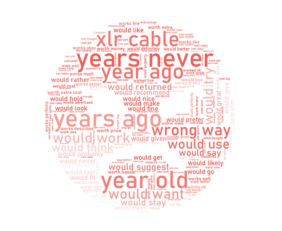

In [65]:
mask = imageio.imread("neg.jpg")

wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/Bahnschrift.ttf', 
    mask=mask, 
    max_words=200, 
    #max_font_size=100 
    width=1000,
    height=700,
    background_color='white' #,
    # scale = 15

)

image_colors = ImageColorGenerator(mask)


wc.generate_from_frequencies(word_counts) 
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

wc.to_file('NEG.png')